# GROUP PROJECT ON EXPLORATORY DATA ANALYSIS AND VISUALIZATIONS (GROUP 1)

## DATA SET: flavors_of_cacao.csv

# Importing the needed libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter

## loading the file into jupyter

In [4]:
#reading the csv
df = pd.read_csv(r"C:\Users\LENOVO\Documents\data bank\flavors_of_cacao.csv")

# Rename some columns 
old_colnames = df.columns
new_colnames = ['Company Name', 'Specific Bean Origin', 'REF', 'Review Year', 'Cocoa Percent','Company Location', 'Rating', 'Bean Type', 'Country']
df = df.rename(columns=dict(zip(old_colnames, new_colnames)))

# modifying some of the data types
df['Cocoa Percent'] = df['Cocoa Percent'].str.replace('%','').astype(float)/100
df

,Company Name,Specific Bean Origin,REF,Review Year,Cocoa Percent,Company Location,Rating,Bean Type,Country
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,0.70,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,0.65,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,0.65,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,0.62,Austria,3.25,,India


In [53]:
#reading the first 5 rows in the data set
df.head()

,Company Name,Specific Bean Origin,REF,Review Year,Cocoa Percent,Company Location,Rating,Bean Type,Country
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru


In [54]:
#reading the last 5 rows of the data set
df.tail()

,Company Name,Specific Bean Origin,REF,Review Year,Cocoa Percent,Company Location,Rating,Bean Type,Country
1790,Zotter,Peru,647,2011,0.70,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,0.65,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,0.65,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,0.62,Austria,3.25,,India
1794,Zotter,"Brazil, Mitzi Blue",486,2010,0.65,Austria,3.00,,Brazil


In [55]:
# looking at the number of rows and columns
df.shape

(1795, 9)

In [56]:
#Describing the data
df.describe()

,REF,Review Year,Cocoa Percent,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,0.716983,3.185933
std,552.886365,2.927210,0.063231,0.478062
min,5.000000,2006.000000,0.420000,1.000000
25%,576.000000,2010.000000,0.700000,2.875000
50%,1069.000000,2013.000000,0.700000,3.250000
75%,1502.000000,2015.000000,0.750000,3.500000
max,1952.000000,2017.000000,1.000000,5.000000


In [57]:
# Describing the dataset based on only rating
df.describe().Rating

count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: Rating, dtype: float64

In [58]:
# relationship between Percentage of cocoa and rating
corr = df[['Rating', 'Cocoa Percent']].corr()
corr

,Rating,Cocoa Percent
Rating,1.00000,-0.16482
Cocoa Percent,-0.16482,1.00000


In [60]:
# Number of Reviews per year
review_yr = df['Review Year'].value_counts()
review_yr

2015    285
2014    247
2016    219
2012    195
2013    184
2011    165
2009    123
2010    111
2008     93
2007     77
2006     72
2017     24
Name: Review Year, dtype: int64

In [62]:
# top ten cocoa producing countries
df['Country'].value_counts().head(10)

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
                       73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Name: Country, dtype: int64

In [71]:
# top ten chocolate producing companies
df['Company Name'].value_counts().head(10)

Soma                          47
Bonnat                        27
Fresco                        26
Pralus                        25
A. Morin                      23
Arete                         22
Guittard                      22
Domori                        22
Valrhona                      21
Hotel Chocolat (Coppeneur)    19
Name: Company Name, dtype: int64

In [69]:
#number of chocolates produced by each company
company = df['Company Name'].value_counts()
company

Soma                 47
Bonnat               27
Fresco               26
Pralus               25
A. Morin             23
                     ..
Chocablog             1
Marigold's Finest     1
Chloe Chocolat        1
Chequessett           1
Ki' Xocolatl          1
Name: Company Name, Length: 416, dtype: int64

In [66]:
# top ten chocolate producing companies and countries they are located
df[['Company Name', 'Company Location']].value_counts().head(10)

Company Name                Company Location
Soma                        Canada              47
Bonnat                      France              27
Fresco                      U.S.A.              26
Pralus                      France              25
A. Morin                    France              23
Domori                      Italy               22
Guittard                    U.S.A.              22
Arete                       U.S.A.              22
Valrhona                    France              21
Hotel Chocolat (Coppeneur)  U.K.                19
dtype: int64

In [139]:
# top ten chocolate producing countries
comp_loc = df['Company Location'].value_counts().head(10)
comp_loc

U.S.A.         764
France         156
Canada         125
U.K.            96
Italy           63
Ecuador         54
Australia       49
Belgium         40
Switzerland     38
Germany         35
Name: Company Location, dtype: int64

In [80]:
# Number of chocolates per rating

df['Rating'].value_counts(ascending=False)

3.50    392
3.00    341
3.25    303
2.75    259
3.75    210
2.50    127
4.00     98
2.00     32
2.25     14
1.50     10
1.00      4
1.75      3
5.00      2
Name: Rating, dtype: int64

In [150]:
# How the variours cocoa producing countries faired in the rating
cocoa_origin_rating = df.groupby(['Country'])['Rating'].mean().sort_values(ascending=False)
cocoa_origin_rating

Country
Ven, Bolivia, D.R.              4.000000
Dom. Rep., Madagascar           4.000000
Guat., D.R., Peru, Mad., PNG    4.000000
Venezuela, Java                 4.000000
Gre., PNG, Haw., Haiti, Mad     4.000000
                                  ...   
West Africa                     2.583333
Peru, Madagascar                2.500000
Venezuela, Trinidad             2.500000
Puerto Rico                     2.500000
Ghana & Madagascar              2.000000
Name: Rating, Length: 100, dtype: float64

In [119]:
# How the variours Chocolate producing countries faired in the rating
comp_loc_rating = df.groupby(['Company Location'])['Rating'].mean().sort_values(ascending=False)
comp_loc_rating

Company Location
Chile                3.750000
Amsterdam            3.500000
Netherlands          3.500000
Philippines          3.500000
Iceland              3.416667
Vietnam              3.409091
Brazil               3.397059
Poland               3.375000
Australia            3.357143
Guatemala            3.350000
Switzerland          3.342105
Singapore            3.333333
Italy                3.325397
Scotland             3.325000
Canada               3.324000
Argentina            3.305556
Denmark              3.283333
Spain                3.270000
France               3.251603
Suriname             3.250000
Israel               3.250000
Finland              3.250000
Fiji                 3.250000
Bolivia              3.250000
Russia               3.250000
Austria              3.240385
Honduras             3.208333
Hungary              3.204545
South Korea          3.200000
Domincan Republic    3.200000
New Zealand          3.191176
Germany              3.178571
Venezuela            3.

# Visualizations

C:\Users\LENOVO\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


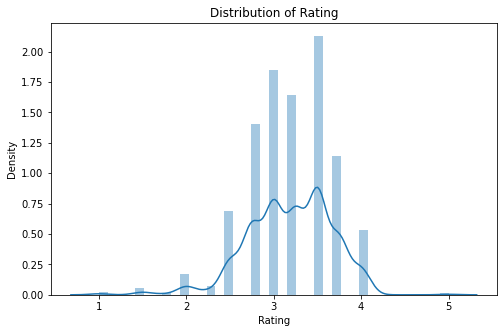

In [5]:
## Looking at distribution of rating

fig, ax = plt.subplots(figsize=[8,5])
sb.distplot(df['Rating'], ax=ax)

#giving a title
ax.set_title('Distribution of Rating')

plt.show()

## Bar Graph

In [6]:
# Bar graph of number of reviews per year
#creating a dictionary to hold the reviews per year

review_yr_dict = dict(Counter(df['Review Year']).most_common(10))
review_yr_dict

{2015: 285,
 2014: 247,
 2016: 219,
 2012: 195,
 2013: 184,
 2011: 165,
 2009: 123,
 2010: 111,
 2008: 93,
 2007: 77}

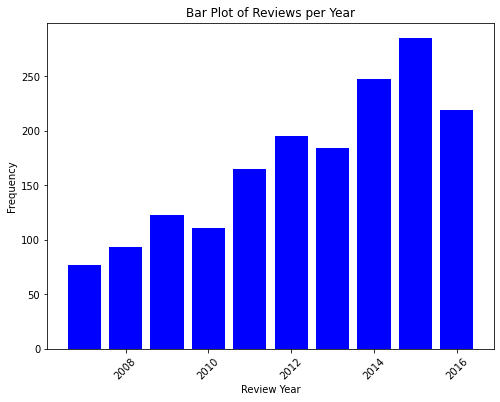

In [162]:
# Number of reviews per year

plt.figure(figsize=(8,6))

plt.bar(review_yr_dict.keys(), review_yr_dict.values(), color='blue')


#labeling the axis
plt.xlabel('Review Year')
plt.ylabel('Frequency')

#giving title
plt.title('Bar Plot of Reviews per Year')

plt.xticks(rotation=45)
plt.show()

In [142]:
#company locations dictionary

com_loc_dict = dict(Counter(df['Company Location']).most_common(10))
com_loc_dict

{'U.S.A.': 764,
 'France': 156,
 'Canada': 125,
 'U.K.': 96,
 'Italy': 63,
 'Ecuador': 54,
 'Australia': 49,
 'Belgium': 40,
 'Switzerland': 38,
 'Germany': 35}

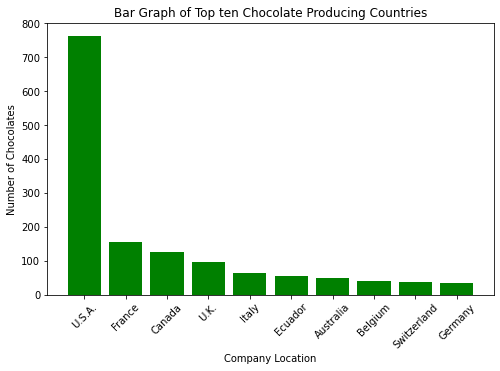

In [183]:
# Bar graph to show top ten chocolate producing countries
plt.figure(figsize=(8,5))

plt.bar(com_loc_dict.keys(), com_loc_dict.values(), color='green')


#labeling the axis
plt.xlabel('Company Location')
plt.ylabel('Number of Chocolates')

#giving title
plt.title('Bar Graph of Top ten Chocolate Producing Countries')


plt.xticks(rotation=45)
plt.show()

### Pie Chart for Cocoa top ten cocoa producing counties

In [8]:
#cocoa producing countries dictionary
# creating a dictionary containing the top ten cocoa producing countries
country_dict = dict(Counter(df['Country']).most_common(10))
country_dict

{'Venezuela': 214,
 'Ecuador': 193,
 'Peru': 165,
 'Madagascar': 145,
 'Dominican Republic': 141,
 '\xa0': 73,
 'Nicaragua': 60,
 'Brazil': 58,
 'Bolivia': 57,
 'Belize': 49}

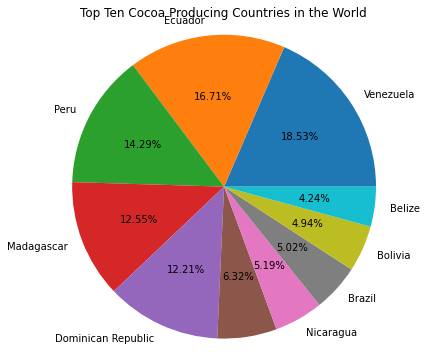

In [9]:
#pie chart for top ten cocoa producing countries
#dimension of the chart
plt.figure(figsize=(6,6))

plt.pie(country_dict.values(), labels=country_dict.keys(), autopct='%1.2f%%')
plt.axis('equal')

#title of the chart
plt.title('Top Ten Cocoa Producing Countries in the World')

plt.show()

Text(0.5, 1.0, 'Goods Flow from Origin to Company location')

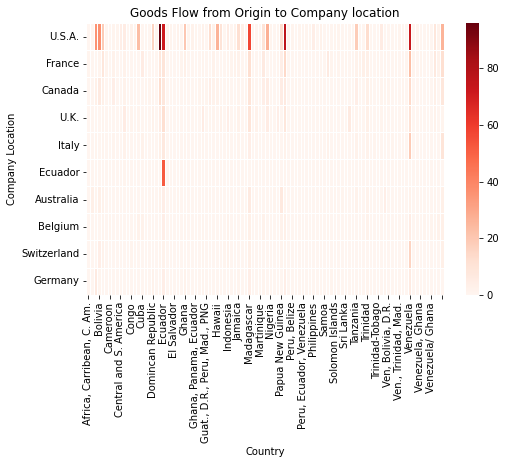

In [10]:
# looking at the flow of cocoa from producing counties to processing countries
flow = pd.crosstab(df['Company Location'],df['Country'])
flow['tot'] = flow.sum(axis=1)
flow = flow.sort_values('tot', ascending=False)
flow = flow.drop('tot', axis=1)

fig, ax = plt.subplots(figsize=[8,5])
sb.heatmap(flow.head(10), cmap='Reds', linewidths=.5)
ax.set_title('Goods Flow from Origin to Company location')

### Generating a heatmap to show the relationship between Rating, Review Year and Cocoa Percent

In [117]:
corr = df[['Rating', 'Review Year', 'Cocoa Percent', 'Company Name']].corr()
corr

,Rating,Review Year,Cocoa Percent
Rating,1.000000,0.099846,-0.164820
Review Year,0.099846,1.000000,0.038177
Cocoa Percent,-0.164820,0.038177,1.000000


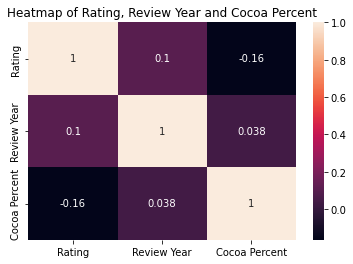

In [118]:
# creating a heatmap to show relationship netween Rating, Review Year and Cocoa Percent

sb.heatmap(corr, annot=True)
plt.title('Heatmap of Rating, Review Year and Cocoa Percent')

plt.show()

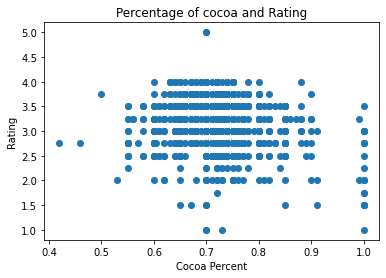

In [182]:
#Scatter Plot to show the relationship between Cocoa percent and rating
plt.scatter(df['Cocoa Percent'], df['Rating'])

plt.title('Percentage of cocoa and Rating')

plt.ylabel('Rating')
plt.xlabel('Cocoa Percent')


plt.show()

Text(0.5, 1.0, 'How Percentage of cocoa in Chocolates Changed over time')

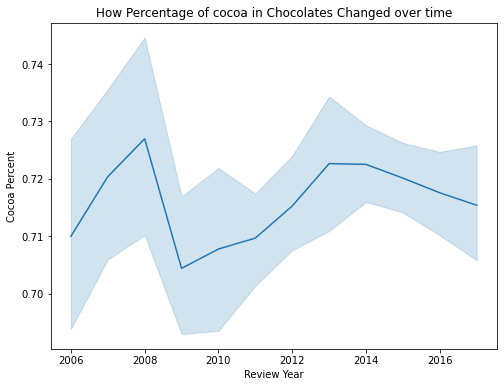

In [11]:
# how percentage of cocoa in chocolates changed over time

plt.figure(figsize=(8,6))
sb.lineplot(data=df, x='Review Year', y='Cocoa Percent')
plt.title('How Percentage of cocoa in Chocolates Changed over time')